# Price Predictor

In [98]:
import pandas as pd

In [99]:
df=pd.read_csv('housing.csv')
df.columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO",'B',"LSTAT","MEDV"]

In [100]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
CRIM       505 non-null float64
ZN         505 non-null float64
INDUS      505 non-null float64
CHAS       505 non-null float64
NOX        505 non-null float64
RM         505 non-null float64
AGE        505 non-null float64
DIS        505 non-null float64
RAD        505 non-null float64
TAX        505 non-null float64
PTRATIO    505 non-null float64
B          505 non-null float64
LSTAT      505 non-null float64
MEDV       505 non-null float64
dtypes: float64(14)
memory usage: 55.3 KB


In [102]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [103]:
df['CHAS'].value_counts()

0.0    470
1.0     35
Name: CHAS, dtype: int64

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

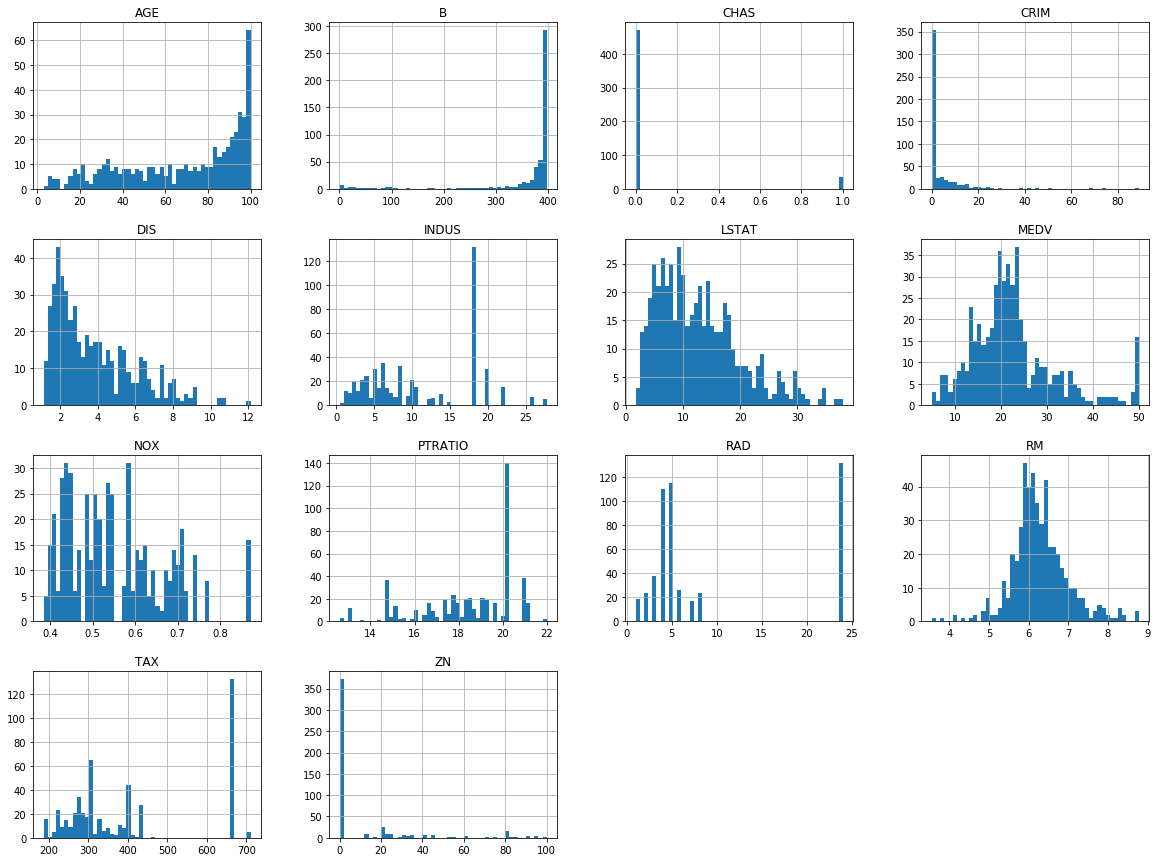

In [105]:
df.hist(bins=50,figsize=(20,15))
plt.show()

# train test splitting

In [106]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)
print(len(train_set),len(test_set))

404 101


In [107]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['CHAS']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [108]:
strat_train_set['CHAS'].value_counts()

0.0    376
1.0     28
Name: CHAS, dtype: int64

In [109]:
strat_test_set['CHAS'].value_counts()

0.0    94
1.0     7
Name: CHAS, dtype: int64

In [110]:
df=strat_train_set.copy()

# looking for correlations

In [111]:
corr_matrix=df.corr()

In [112]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660761
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
LSTAT     -0.739129
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F15128F60>,
      dtype=object)

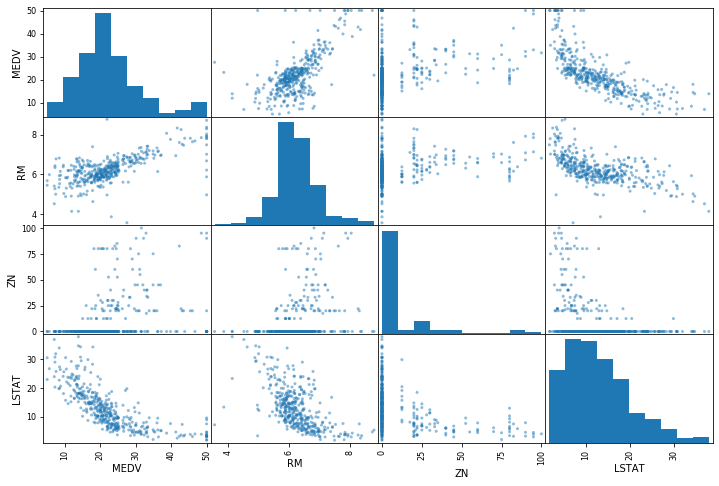

In [113]:
from pandas.plotting import scatter_matrix
attr=['MEDV','RM','ZN','LSTAT']
scatter_matrix(df[attr],figsize=(12,8))

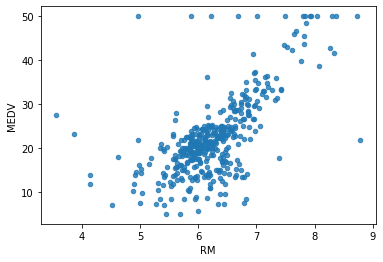

In [114]:
df.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

# attribut combinations

In [115]:
df['TAXRM']=df['TAX']/df['RM']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9,53.607897
348,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89,26.6,48.277850
476,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0,125.565611
321,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70,20.4,47.508691
326,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79,22.2,47.180667


In [116]:
corr_matrix=df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.660761
B          0.344609
ZN         0.329206
DIS        0.231680
CHAS       0.215042
RAD       -0.362619
AGE       -0.378913
CRIM      -0.397993
NOX       -0.421815
TAX       -0.441617
INDUS     -0.448303
PTRATIO   -0.486045
TAXRM     -0.506534
LSTAT     -0.739129
Name: MEDV, dtype: float64

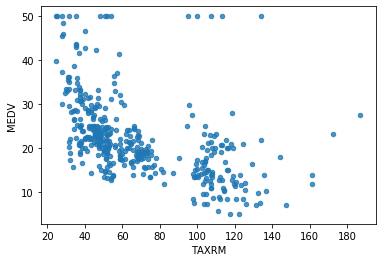

In [117]:
df.plot(kind='scatter',x='TAXRM',y='MEDV',alpha=0.8)

# missing attributes

In [118]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(df)



SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [119]:
x=imputer.transform(df)

In [120]:
df_tr=pd.DataFrame(x,columns=df.columns)

In [121]:
df_tr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25,20.9,53.607897
1,0.02899,40.0,1.25,0.0,0.429,6.939,34.5,8.7921,1.0,335.0,19.7,389.85,5.89,26.6,48.277850
2,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0,125.565611
3,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70,20.4,47.508691
4,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79,22.2,47.180667


# feature scaling

primarily two types of feature scaling
1. min-max scaler(Normalization)----(value-min)/(max-min),sklearn provides class minmaxscaler for this
2. Standardization----(value-mean)/std, sklearn provides a class standard scaler for this

# creating pipeline

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [123]:
df_pipeline=my_pipeline.fit_transform(df)

In [124]:
df_pipeline=pd.DataFrame(df_pipeline,columns=df.columns)
x=df_pipeline.drop('MEDV',axis=1)
y=df_pipeline['MEDV']

In [128]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
0,-0.442412,3.187168,-1.125816,-0.272888,-1.420386,-0.546018,-1.741261,2.562844,-0.995348,-0.573878,-0.994282,0.438530,-0.498337,-0.444818
1,-0.443200,1.360989,-1.476808,-0.272888,-1.102404,0.999160,-1.198966,2.361179,-0.995348,-0.454851,0.566138,0.382420,-0.965620,-0.614709
2,1.376623,-0.465190,0.997765,-0.272888,0.487508,-1.377478,1.012471,-0.790198,1.635133,1.515046,0.802565,-0.042557,1.679536,1.848787
3,-0.404102,-0.465190,-0.576563,-0.272888,-0.552380,-0.306174,-0.656671,0.443903,-0.537873,-0.740516,0.518853,0.456636,-0.713899,-0.639226
4,-0.417466,-0.465190,-0.576563,-0.272888,-0.552380,-0.245123,-0.874998,0.771126,-0.537873,-0.740516,0.518853,0.456636,-0.006021,-0.649681
5,1.836311,-0.465190,0.997765,-0.272888,0.341408,-2.360112,1.107549,-1.047719,1.635133,1.515046,0.802565,-3.418482,2.995160,2.433396
6,-0.420735,0.539209,-0.799789,-0.272888,-1.085216,0.270906,-2.100444,1.704002,-0.309135,-0.484608,0.282425,0.247885,-1.285486,-0.519714
7,-0.432844,-0.465190,-0.403270,-0.272888,-0.320339,0.769491,0.096908,-0.434436,-0.537873,-0.163235,1.133563,0.442741,-0.718071,-0.348528
8,0.583944,-0.465190,0.997765,-0.272888,0.229684,0.140082,0.618075,-0.812805,1.635133,1.515046,0.802565,-2.843073,0.668480,1.190561
9,-0.427973,0.676172,-0.906996,-0.272888,-0.896145,-0.154999,-1.385600,1.900910,-0.194767,-0.758370,0.566138,0.391158,-0.830720,-0.680415


# selecting a model

In [129]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
df_pipeline.shape

(404, 15)